First 5 rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 

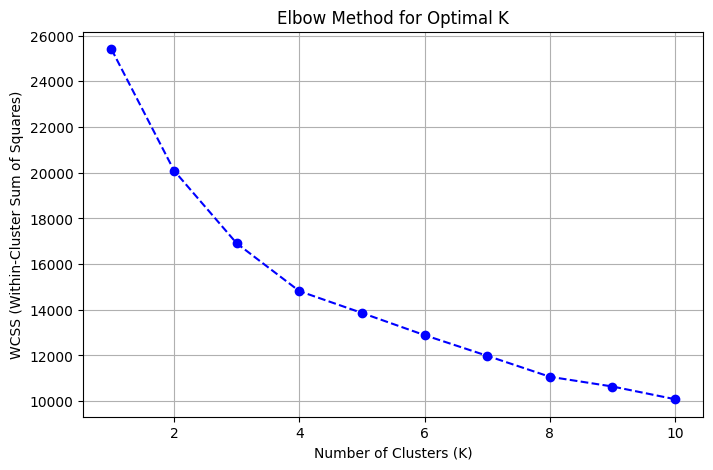

Observation: The 'elbow' appears around K=4, suggesting 4 optimal clusters.

Cluster Distribution:
Cluster_KMeans
1    948
3    734
2    663
0    478
Name: count, dtype: int64 



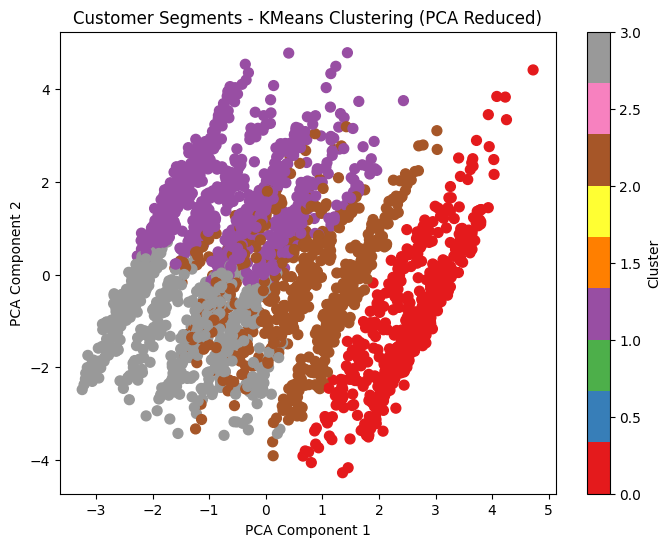

Conclusion: K-Means identified 4 distinct customer segments, visible after PCA reduction.



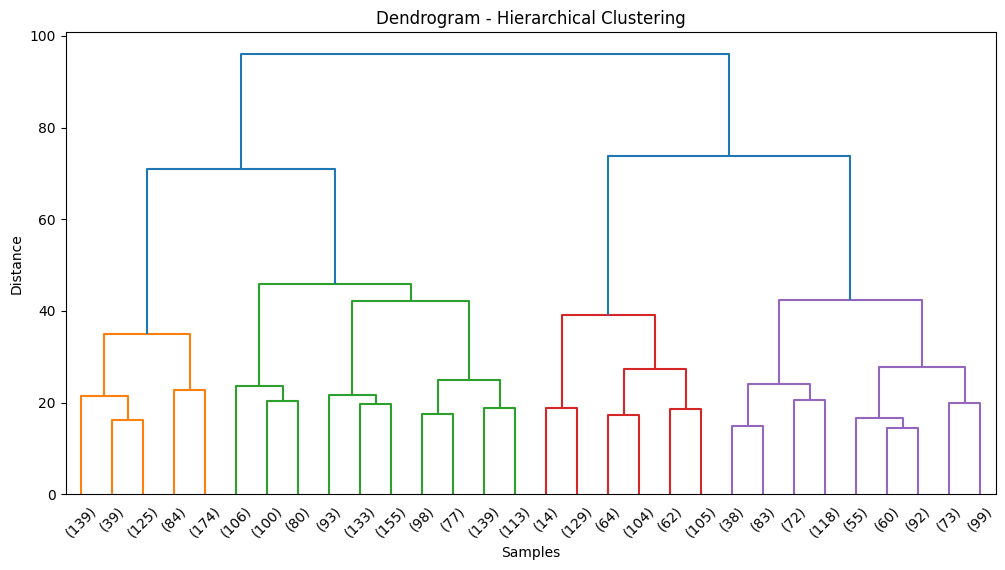

Conclusion:
The dendrogram shows clear hierarchical relationships among samples.
Approx. 4 clusters can be observed, supporting the K-Means elbow result.



In [1]:
# 🧮 Assignment 5: Customer Segmentation using K-Means and Hierarchical Clustering

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Step 2: Load and Explore the Dataset
# Make sure 'sales_data_sample.csv' is in the same folder as this notebook
df = pd.read_csv('sales_data_sample.csv', encoding='ANSI')

print("First 5 rows of the dataset:")
print(df.head(), "\n")

print("Dataset Information:")
print(df.info(), "\n")

# Step 3: Data Preprocessing
# Keep only numeric columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Drop rows with missing numeric values
df_numeric = df_numeric.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

print("Shape of scaled numeric data:", scaled_data.shape, "\n")

# Step 4: Elbow Method to Find Optimal Number of Clusters (K)
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

print("Observation: The 'elbow' appears around K=4, suggesting 4 optimal clusters.\n")

# Step 5: Apply K-Means Clustering
optimal_k = 4  # Based on elbow method observation
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster_KMeans'] = clusters

# Display cluster counts
print("Cluster Distribution:")
print(df['Cluster_KMeans'].value_counts(), "\n")

# Step 6: Visualize Clusters using PCA (2D reduction)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=50)
plt.title('Customer Segments - KMeans Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

print("Conclusion: K-Means identified 4 distinct customer segments, visible after PCA reduction.\n")

# Step 7: Hierarchical Clustering and Dendrogram
linked = linkage(scaled_data, method='ward')  # 'ward' minimizes variance within clusters

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

print("Conclusion:")
print("The dendrogram shows clear hierarchical relationships among samples.")
print("Approx. 4 clusters can be observed, supporting the K-Means elbow result.\n")
